In [136]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import re
import string
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px
sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [137]:
d1 = pd.read_csv('/content/vaccination_all_tweets.csv')
d1.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [138]:
d1.shape

(228207, 16)

In [114]:
data = ['user_name', 'date', 'text', 'user_location']
dloc = d1[data]
dloc.head()

,user_name,date,text,user_location
0,Rachel Roh,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,"La Crescenta-Montrose, CA"
1,Albert Fong,2020-12-13 16:27:13,While the world has been on the wrong side of ...,"San Francisco, CA"
2,eli🇱🇹🇪🇺👌,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Your Bed
3,Charles Adler,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...","Vancouver, BC - Canada"
4,Citizen News Channel,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,NaN


In [139]:
data1 = ['user_name', 'date', 'text']
df = d1[data1]
df.head()

,user_name,date,text
0,Rachel Roh,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...
1,Albert Fong,2020-12-13 16:27:13,While the world has been on the wrong side of ...
2,eli🇱🇹🇪🇺👌,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,Charles Adler,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're..."
4,Citizen News Channel,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...


In [140]:
df.user_name = df.user_name.astype('category')
df.user_name = df.user_name.cat.codes

df.date = pd.to_datetime(df.date).dt.date
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_name,date,text
0,52790,2020-12-20,Same folks said daikon paste could treat a cyt...
1,3603,2020-12-13,While the world has been on the wrong side of ...
2,74633,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,12945,2020-12-12,"Facts are immutable, Senator, even when you're..."
4,14095,2020-12-12,Explain to me again why we need a vaccine @Bor...


In [117]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



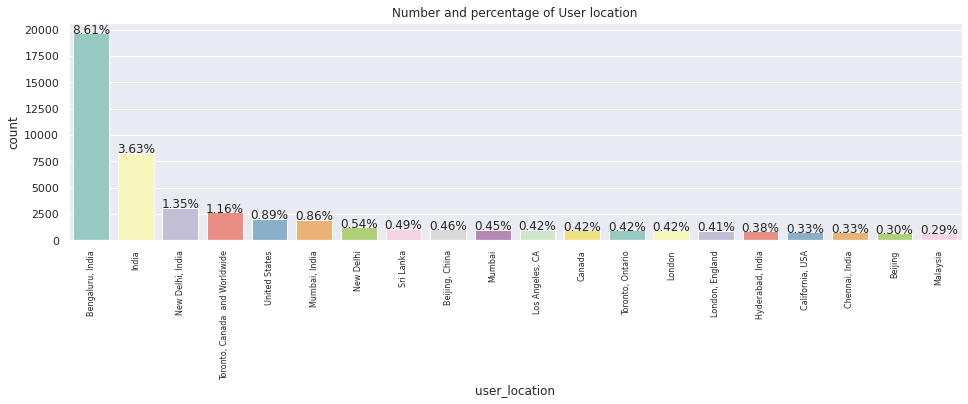

In [118]:
plot_count("user_location", "User location", dloc,4)

# Preprocessing Data

In [141]:
tks = df['text']
tks.head()

0    Same folks said daikon paste could treat a cyt...
1    While the world has been on the wrong side of ...
2    #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3    Facts are immutable, Senator, even when you're...
4    Explain to me again why we need a vaccine @Bor...
Name: text, dtype: object

In [142]:
#lowercase
tks.lowercase = tks.str.lower()
tks.lowercase

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [143]:
#remove url
tks.url = tks.lowercase.apply(lambda x:re.sub(r"http\S+", "", x))
tks.url

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [144]:
#remove punctuation
tks.punc = tks.url.apply(lambda x : x.translate(str.maketrans('', '', string.punctuation)))
tks.punc

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts are immutable senator even when youre no...
4         explain to me again why we need a vaccine bori...
                                ...                        
228202    45 urban bengaluru covidvaccine availability f...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    they promote their vaccines leaving out the st...
228206    45 urban bengaluru covidvaccine availability f...
Name: text, Length: 228207, dtype: object

In [145]:
update_words = ['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words = set(stopwords.words('english'))
stop_words.update(update_words)

tks.rmv = tks.punc.apply(lambda x : ' '.join([word for word in x.split() if word not in stop_words]))
tks.rmv.head(5)

0    folks said daikon paste could treat cytokine s...
1    world wrong side history year hopefully bigges...
2    sputnikv astrazeneca pfizerbiontech moderna ru...
3    facts immutable senator even youre ethically s...
4    explain need vaccine borisjohnson matthancock ...
Name: text, dtype: object

# Text Analysis

In [146]:
word_list = [word for line in tks.rmv for word in line.split()]
word_list[:15]

['folks',
 'said',
 'daikon',
 'paste',
 'could',
 'treat',
 'cytokine',
 'storm',
 'pfizerbiontech',
 'world',
 'wrong',
 'side',
 'history',
 'year',
 'hopefully']

In [147]:
word_counts = Counter(word_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'freq']

px.bar(words_df, x='word', y='freq', title='Most Common Words')

In [148]:
df.text = tks.punc
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_name,date,text
0,52790,2020-12-20,same folks said daikon paste could treat a cyt...
1,3603,2020-12-13,while the world has been on the wrong side of ...
2,74633,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontec...
3,12945,2020-12-12,facts are immutable senator even when youre no...
4,14095,2020-12-12,explain to me again why we need a vaccine bori...


In [149]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
filtered_df = df.loc[(df['date'] >= '2021-01-01')]
filtered_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_name,date,text
1564,64382,2021-01-02,interesting interview with john moore professo...
1657,80466,2021-01-03,⛔ hamilton psw suffers rare but severe reactio...
1658,73587,2021-01-02,when the ceo of pfizerbiontech won’t even take...
1724,80500,2021-01-05,why pfizerbiontech pfizervaccine does not trea...
1725,82787,2021-01-02,katalinkarikó mrnavaccine\npfizerbiontech mode...
...,...,...,...
228202,69581,2021-11-15,45 urban bengaluru covidvaccine availability f...
228203,69581,2021-11-15,1844 bbmp bengaluru covidvaccine availability ...
228204,69581,2021-11-15,1844 urban bengaluru covidvaccine availability...
228205,24085,2021-11-15,they promote their vaccines leaving out the st...


# Sentiment Analysis

In [150]:
sid = SentimentIntensityAnalyzer()
polarity_score = lambda x : sid.polarity_scores(x)
sentiment_scores = filtered_df.text.apply(polarity_score)

In [151]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,0.847,0.153,0.4019
1,0.411,0.589,0.000,-0.8674
2,0.172,0.828,0.000,-0.4810
3,0.124,0.876,0.000,-0.3089
4,0.000,1.000,0.000,0.0000


In [152]:
labelize = lambda x : 'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.000,0.847,0.153,0.4019,positive
1,0.411,0.589,0.000,-0.8674,negative
2,0.172,0.828,0.000,-0.4810,negative
3,0.124,0.876,0.000,-0.3089,negative
4,0.000,1.000,0.000,0.0000,neutral


In [153]:
data = filtered_df.join(sentiment_df.label)
data.head()

,user_name,date,text,label
1564,64382,2021-01-02,interesting interview with john moore professo...,neutral
1657,80466,2021-01-03,⛔ hamilton psw suffers rare but severe reactio...,positive
1658,73587,2021-01-02,when the ceo of pfizerbiontech won’t even take...,negative
1724,80500,2021-01-05,why pfizerbiontech pfizervaccine does not trea...,neutral
1725,82787,2021-01-02,katalinkarikó mrnavaccine\npfizerbiontech mode...,neutral


In [154]:
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,neutral,107522
1,positive,79565
2,negative,37160


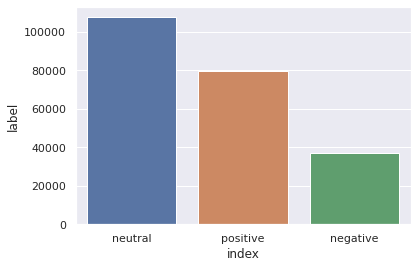

In [155]:
sns.barplot(data=counts_df, x='index', y='label')

In [156]:
data_agg = data[['user_name', 'date', 'label']].groupby(['date', 'label']).count().reset_index()
data_agg.columns = ['date', 'label', 'counts']
data_agg.head()

,date,label,counts
0,2021-01-01,negative,24
1,2021-01-01,neutral,38
2,2021-01-01,positive,33
3,2021-01-02,negative,14
4,2021-01-02,neutral,31


In [157]:
px.line(data_agg, x='date', y='counts', color='label', title='COVID-19 Vaccines Sentiment Analysis')